In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_train_full.dtype

dtype('uint8')

In [5]:
X_train, X_valid = X_train_full[5000:] / 255.0, X_train_full[:5000] / 255.0
y_train, y_valid = y_train_full[5000:], y_train_full[:5000]
X_test = X_test / 255.0

In [39]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [40]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [12]:
history = model.fit(X_train, y_train, epochs=10,
          validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2623 - accuracy: 0.9252 - val_loss: 0.2443 - val_accuracy: 0.9314
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2572 - accuracy: 0.9265 - val_loss: 0.2392 - val_accuracy: 0.9334
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2520 - accuracy: 0.9282 - val_loss: 0.2348 - val_accuracy: 0.9340
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2473 - accuracy: 0.9291 - val_loss: 0.2309 - val_accuracy: 0.9364
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2426 - accuracy: 0.9300 - val_loss: 0.2269 - val_accuracy: 0.9376
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2384 - accuracy: 0.9321 - val_loss: 0.2230 - val_accuracy: 0.9392
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2341 - accuracy: 0.9331 - val_loss: 0.2199 - val_accuracy:

<function matplotlib.pyplot.show>

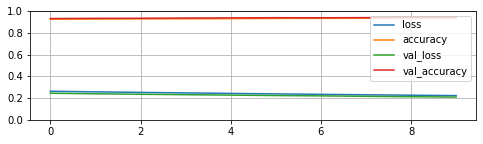

In [13]:
pd.DataFrame(history.history).plot(figsize=(8,2))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show

In [15]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred_class = model.predict_classes(X_new)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [16]:
y_pred

array([[4.4083306e-05, 1.8828922e-07, 5.1609165e-04, 2.4936802e-03,
        2.5625645e-06, 9.7824079e-05, 7.2440365e-08, 9.9593997e-01,
        3.2144471e-05, 8.7330124e-04],
       [4.4267504e-03, 6.1747036e-05, 9.5011425e-01, 2.1113558e-02,
        1.4241161e-07, 5.5607134e-03, 1.8160470e-02, 9.8171881e-08,
        5.6054111e-04, 1.6428355e-06],
       [1.4921185e-05, 9.7867429e-01, 9.4015915e-03, 2.9260183e-03,
        4.1341939e-04, 1.3646913e-03, 1.2521194e-03, 2.8883531e-03,
        2.3337244e-03, 7.3073345e-04]], dtype=float32)

In [17]:
y_pred_class

array([7, 2, 1])

In [18]:
y_test[:3]

array([7, 2, 1], dtype=uint8)

In [19]:
model.save("my_keras_model.h5")

In [20]:
model = keras.models.load_model("my_keras_model.h5")

In [21]:
model.layers

In [38]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
  import time
  run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
  return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()

In [41]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
                                                save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb, early_stopping_cb,
                                                            tensorboard_cb])
model = keras.models.load_model("my_keras_model.h5")

Epoch 1/10
   1/1719 [..............................] - ETA: 0s - loss: 2.3335 - accuracy: 0.1250WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1719/1719 [==============================] - 5s 3ms/step - loss: 1.7386 - accuracy: 0.5638
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.9108 - accuracy: 0.8071
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6076 - accuracy: 0.8569
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4903 - accuracy: 0.8751
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4299 - accuracy: 0.8867
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3925 - accuracy: 0.8941
Epoch 7/10
1719/1719 [==

In [58]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[28, 28]):
  model = keras.models.Sequential()
  model.add(keras.layers.InputLayer(input_shape=input_shape))
  for layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation="relu"))
  model.add(keras.layers.Dense(1, activation="softmax"))
  optimizer = keras.optimizers.SGD(lr=learning_rate)
  model.compile(loss="sparse_categorical_crossentropy",
                optimizer=optimizer,
                metrics=["accuracy"])
  return model

In [59]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2)
}

#rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)

#rnd_search_cv.fit(X_train, y_train, epochs=10,
#                  validation_data=(X_valid, y_valid),
#                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])